<a href="https://colab.research.google.com/github/adriennegoode/Seattle-Weather/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Data Preperation for Seattle and St. Louis data. 
Contains: 
- Importing data
- Simpflifying data to categories we are going to use (Means selecting data points that we want to use. 
- Making sure date/time values are consistant across all data 
- Merging data


## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

In [3]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

In [4]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Explore the contents of the data sets

In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


OBSERVATIONS
- From looking at SEA and STL data we can see that there are a different amount of enteries for Seattle and St. Louis. (SEA has 1,658 and STL has 54,574)
- We also see that there are different stations in where the data is collected in both cities. 
- SEA data set has a few more columns that STL
- Looking at the head of each data see the date is represented differently between both data sets. 

In our SEA data set we have one station. STL we have a few stations to choose from. Ultimately we narrow it down looking at the station that has the most values. 

In [ ]:
df_stlouis['STATION'].unique

<bound method Series.unique of 0        US1MOSS0027
1        US1MOSS0027
2        US1MOSS0027
3        US1MOSS0027
4        US1MOSS0027
            ...     
54569    US1MOSL0084
54570    US1MOSL0084
54571    US1MOSL0084
54572    US1MOSL0084
54573    US1MOSL0084
Name: STATION, Length: 54574, dtype: object>

In [ ]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [ ]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

## Convert data types, if necessary

Convert date to datetime

In [5]:
df_seattle['DATE']= pd.to_datetime(df_seattle['DATE'])

In [6]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. 
- Based on what we came up with below, our data was suitable to answer our question. 
- But we did find a few more discrepencies in our data. Including missing data from Febuary 2018 in our SEA dataset. 
- The STL dataset starts in 2017 and SEA datset starts in 2018

Plot the daily precipitation

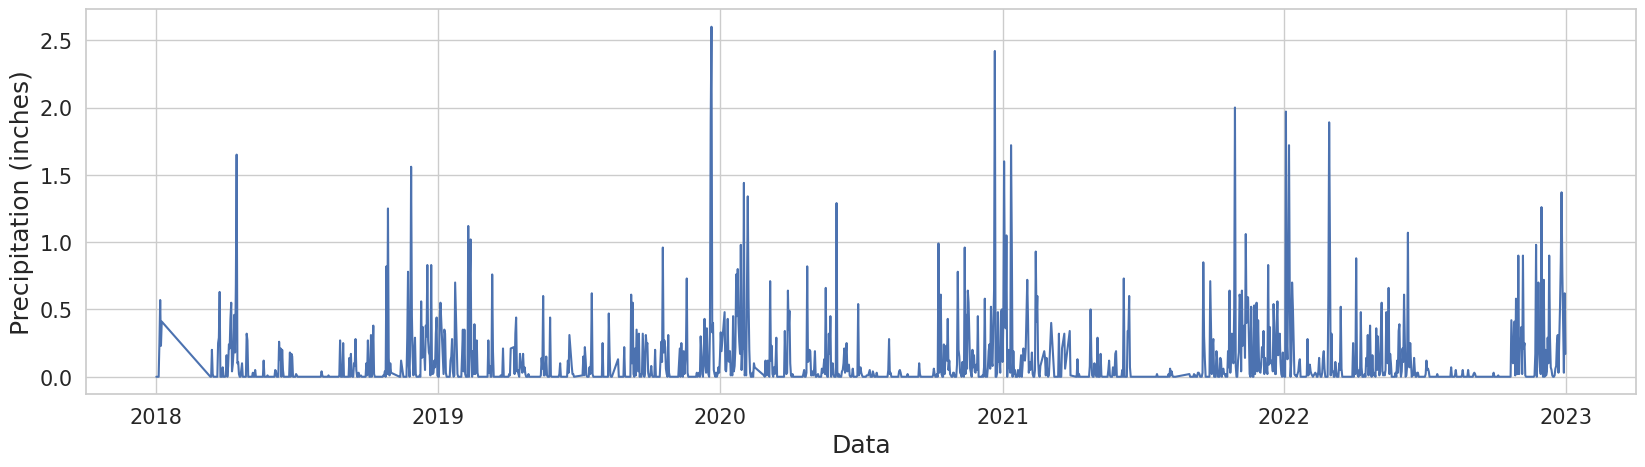

In [12]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Data', fontsize=18)
plt.ylabel ('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

Missing date from febuary and then some 

In [13]:
df_seattle.head(30)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-12,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-13,NaN,NaN,0.00,NaN,NaN,NaN,NaN


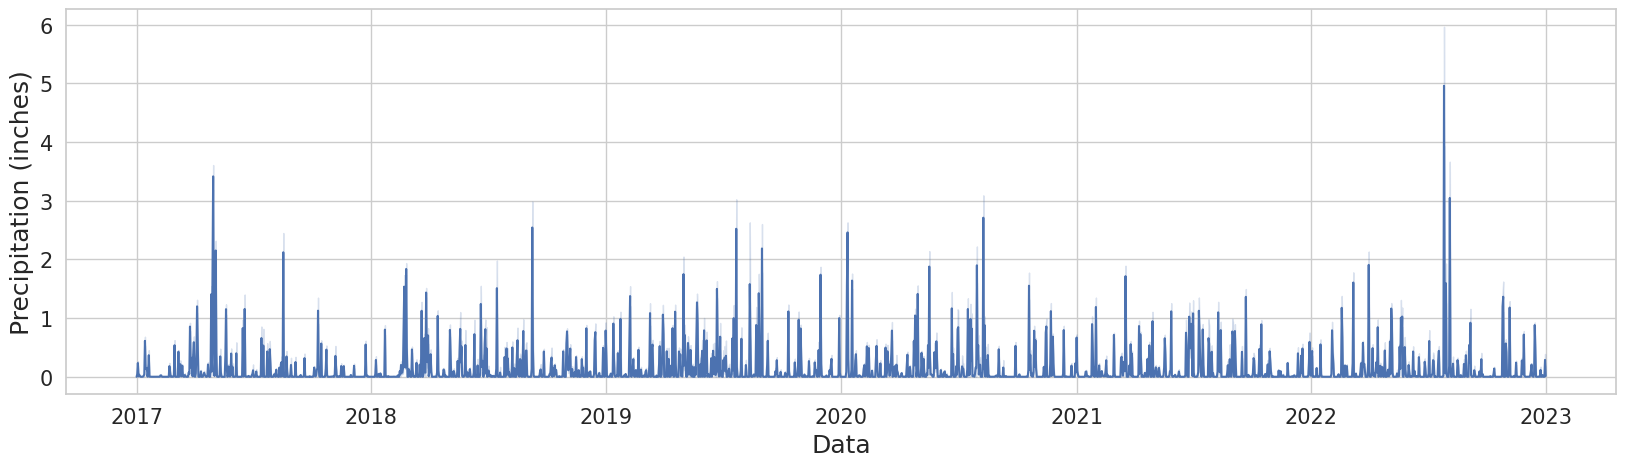

In [11]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_stlouis, x='DATE', y='PRCP')

plt.xlabel('Data', fontsize=18)
plt.ylabel ('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

## Select relevant subsets of the data

GOALS: 
- Looking at stations and select which variables we want to use. 
- Ultimatley we want to merge tables together
- What to do with missing data...grouping and different visualizations that we want to take on. 

- Possibly group into seasons to see more in depth

ENDGoal: To make data more easily readable and clear up data. 

STL DATASET
- We want to get rid of stations (select the one by the airport)
- Get STL dataset from 2018 and beyond 


Use explicit array-style indexing with loc 

In [7]:
df_seattle [['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


Explicit Indexing

In [8]:
df_seattle.loc[:2]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [9]:
df_seattle.iloc[-3]

STATION               US1WAKG0225
NAME       SEATTLE 2.1 ESE, WA US
DATE          2022-12-29 00:00:00
DAPR                          NaN
MDPR                          NaN
PRCP                         0.03
SNOW                          NaN
SNWD                          NaN
WESD                          NaN
WESF                          NaN
Name: 1655, dtype: object

Select Row using Logical Indexing
- Looking at percipitation more than 0 and between 0.5 and 0.75

In [16]:
df_seattle[df_seattle['PRCP'].between (0.5,0.75)]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
20,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-24,NaN,NaN,0.63,NaN,NaN,NaN,NaN
35,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-08,NaN,NaN,0.55,NaN,NaN,NaN,NaN
41,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-14,NaN,NaN,0.68,NaN,NaN,NaN,NaN
271,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-12-10,NaN,NaN,0.56,NaN,NaN,NaN,NaN
296,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-04,NaN,NaN,0.55,NaN,NaN,NaN,NaN
313,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-23,NaN,NaN,0.70,NaN,NaN,NaN,NaN
331,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-02-11,NaN,NaN,0.70,4.0,NaN,NaN,NaN
419,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-05-17,NaN,NaN,0.60,NaN,NaN,NaN,NaN
472,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-07-19,NaN,NaN,0.62,NaN,NaN,NaN,NaN


In [53]:
df_seattle[df_seattle['PRCP'] > 0 ]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
10,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-14,NaN,NaN,0.20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN


Looking at STL dataset from 2018 beyond

In [17]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE']>='2018-01-01']

In [18]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


Subset looking at one particular location @ Airport for STL

In [19]:
df_stlouis =df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [20]:
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

## Identify and deal with missing values

Values that are NaN

In [54]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


In [21]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


Missing Values... 
Seattle has 1636 values, no precipitation values for all of the dates. (Most likely because Feb values are left out.)
There should be 1826 values if dataset covers all days for 5 years. 
St. Louis has all values. 

## Join data frames keeping `DATE` and `PRCP` columns

In [55]:
df1 = pd.DataFrame({'day':[1, 2, 3, 4, 5], 'prcp':[0.1, 0.2, 0.3, 0.4, 0.5 ]})
df1

,day,prcp
0,1,0.1
1,2,0.2
2,3,0.3
3,4,0.4
4,5,0.5


In [56]:
df2 = pd.DataFrame({'day':[1, 3, 5, 7], 'prcp':[1.1, 1.3, 1.5, 1.7]})
df2

,day,prcp
0,1,1.1
1,3,1.3
2,5,1.5
3,7,1.7


In [57]:
df = df_stlouis [['DATE', 'PRCP']].merge(df_seattle[['DATE','PRCP']], on='DATE', how='left')

In [58]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


Incorperate join to get day column. 

In [59]:
df_join = df1.merge(df2, on = 'day', how = 'left')

df_join

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5


## Create a tidy data frame with columns for city and precipitation

In [60]:
df_tidy = pd.melt(df_join, id_vars = 'day', var_name = 'CITY', value_name = 'PRCP')

df_tidy

,day,CITY,PRCP
0,1,prcp_x,0.1
1,2,prcp_x,0.2
2,3,prcp_x,0.3
3,4,prcp_x,0.4
4,5,prcp_x,0.5
5,1,prcp_y,1.1
6,2,prcp_y,NaN
7,3,prcp_y,1.3
8,4,prcp_y,NaN
9,5,prcp_y,1.5


In [62]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

### Rename columns or values to follow best practices

Renaming city to SEA and STL


In [63]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [52]:
df.head

<bound method NDFrame.head of            date city  precipitation
0    2018-01-01  STL           0.00
1    2018-01-02  STL           0.00
2    2018-01-03  STL           0.00
3    2018-01-04  STL           0.00
4    2018-01-05  STL           0.00
...         ...  ...            ...
3647 2022-12-27  SEA           0.78
3648 2022-12-28  SEA           0.40
3649 2022-12-29  SEA           0.03
3650 2022-12-30  SEA           0.62
3651 2022-12-31  SEA           0.17

[3652 rows x 3 columns]>

In [64]:
df.tail

<bound method NDFrame.tail of            DATE CITY  PRCP
0    2018-01-01  STL  0.00
1    2018-01-02  STL  0.00
2    2018-01-03  STL  0.00
3    2018-01-04  STL  0.00
4    2018-01-05  STL  0.00
...         ...  ...   ...
3647 2022-12-27  SEA  0.78
3648 2022-12-28  SEA  0.40
3649 2022-12-29  SEA  0.03
3650 2022-12-30  SEA  0.62
3651 2022-12-31  SEA  0.17

[3652 rows x 3 columns]>

Renaming column titles from uppercase to lowercase

In [65]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

In [66]:
df.head

<bound method NDFrame.head of            date city  precipitation
0    2018-01-01  STL           0.00
1    2018-01-02  STL           0.00
2    2018-01-03  STL           0.00
3    2018-01-04  STL           0.00
4    2018-01-05  STL           0.00
...         ...  ...            ...
3647 2022-12-27  SEA           0.78
3648 2022-12-28  SEA           0.40
3649 2022-12-29  SEA           0.03
3650 2022-12-30  SEA           0.62
3651 2022-12-31  SEA           0.17

[3652 rows x 3 columns]>

## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. It is fine to return to modify this step after exploring the data further.

<Axes: xlabel='date', ylabel='precipitation'>

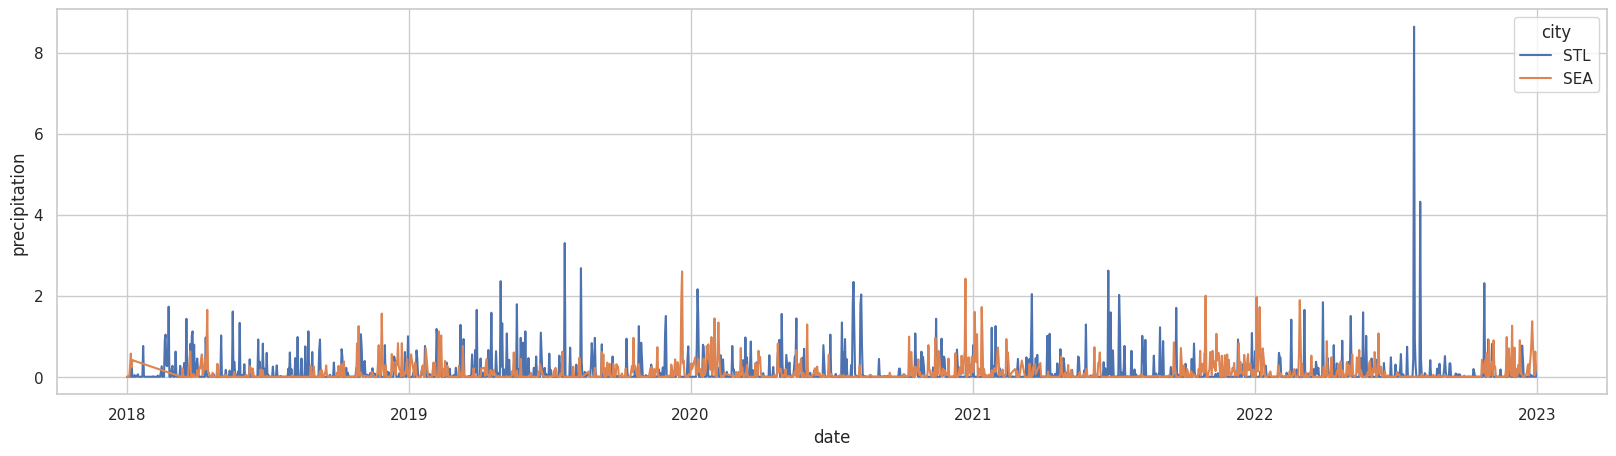

In [75]:
plt.figure(figsize=(20, 5))
sns.lineplot(data = df, x='date', y='precipitation', hue ='city')

<Axes: xlabel='city', ylabel='precipitation'>

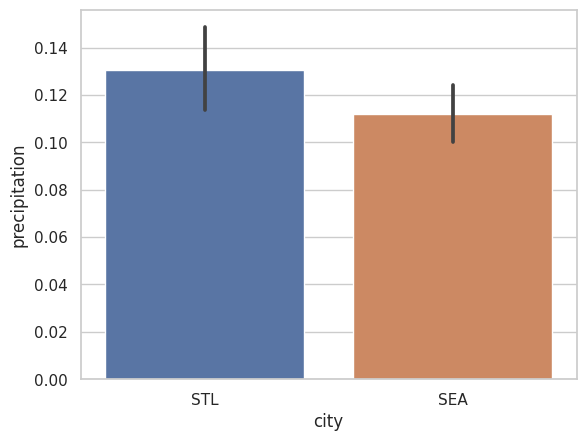

In [70]:
sns.barplot(data=df, x='city', y='precipitation')

List out things that we want to perform on the data.
- Scattergrph comparing Seattle and St. Louis
- Add up total inches per each season 
- Bar graph comparing inches of rain for each season
- How many days does it rain per year?

## Export the clean .csv file